## Section 1: Data Preprocessing

Kaggle Dataset Link: [Used Car Price](https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho)

### Import and load the datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
uploaded = files.upload()

Saving car data.csv to car data.csv


In [3]:
df = pd.read_csv("car data.csv")

### Data Exploration

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [6]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
df.select_dtypes(include = 'object').columns

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [10]:
df.select_dtypes(include = ['int64','float64']).columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

### Dealing with missing values

In [11]:
df.isna().values.any()

False

In [12]:
df.isna().values.sum()

0

### Restructure the dataset

In [13]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [14]:
df = df.drop(columns = 'Car_Name')
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [15]:
#Add a column - Current Year to df
df['Current_Year'] = 2020

In [16]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [17]:
df['Years_Old'] = df['Current_Year'] - df['Year']
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Years_Old
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [18]:
df = df.drop(columns =['Current_Year', 'Year'])
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_Old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


### Dealing with categorical columns

In [19]:
df.select_dtypes(include = 'object').columns

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [20]:
df['Fuel_Type'].nunique()

3

In [21]:
df['Seller_Type'].nunique()

2

In [22]:
df['Transmission'].nunique()

2

In [23]:
df = pd.get_dummies(data = df, drop_first = True)

In [24]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [25]:
df.shape

(301, 9)

In [26]:
df.select_dtypes(include = 'object').columns

Index([], dtype='object')

### Correlation matrix and heatmap

In [27]:
newdf = df.drop(columns = 'Selling_Price')

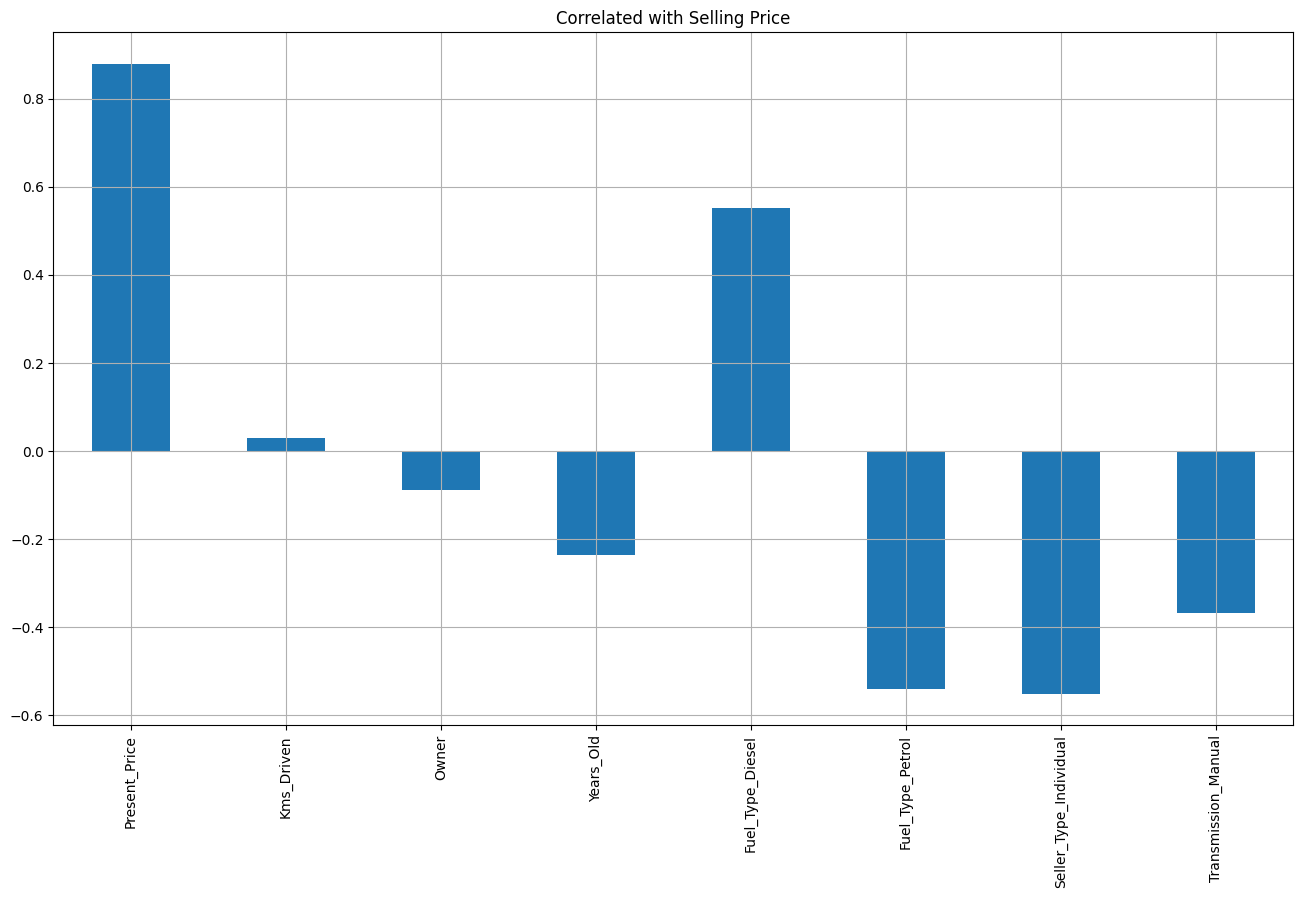

In [28]:
corr = newdf.corrwith(df['Selling_Price']).plot.bar(
    figsize = (16,9), title = "Correlated with Selling Price", grid = True
)

In [29]:
corr = df.corr()

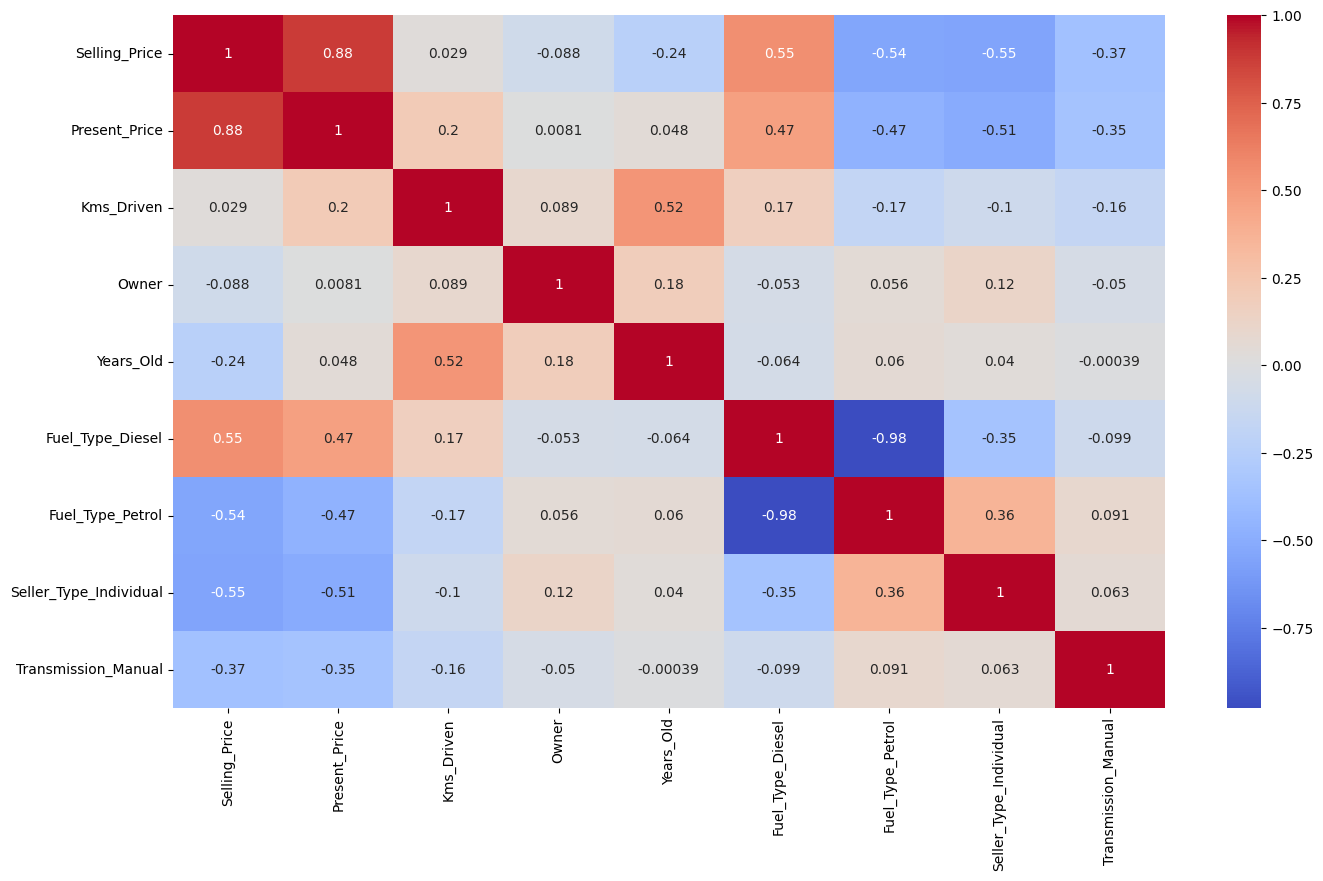

In [30]:
plt.figure(figsize = (16,9))
sns.heatmap (corr, annot=True, cmap = 'coolwarm')
plt.show()

### Splitting the dataset into train and test sets

In [31]:
df.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Years_Old',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

In [32]:
x = df.drop(columns = 'Selling_Price')
y = df['Selling_Price']

In [33]:
x.shape

(301, 8)

In [34]:
y.shape

(301,)

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [36]:
x_train.shape

(240, 8)

In [37]:
x_test.shape

(61, 8)

In [38]:
y_train.shape

(240,)

In [39]:
y_test.shape

(61,)

## Section 2: Building the model

### 1) Multiple Linear Regression

In [40]:
regressor_mlr = LinearRegression()
regressor_mlr.fit(x_train,y_train)

LinearRegression()

In [41]:
y_pred = regressor_mlr.predict(x_test)

In [42]:
r2_score(y_test,y_pred)

0.9144342972228519

### 2) Random Forest Regression

In [43]:
regressor_rf = RandomForestRegressor()
regressor_rf.fit(x_train,y_train)

RandomForestRegressor()

In [44]:
y_pred = regressor_rf.predict(x_test)

In [45]:
r2_score(y_test,y_pred)

0.9553903444911875

## Section 3: Hyperparameter tuning using RandomizedSearchCV

In [46]:
parameters = { 'n_estimators' : [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
              'criterion' : ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
               'max_depth' : [10, 20, 30, 40, 50],
               'min_samples_split' : [2, 5, 10, 20, 50],
               'min_samples_leaf' : [1, 2, 5, 10],
               'max_features' : ['auto', 'sqrt', 'log2']
}

In [47]:
parameters

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
 'max_depth': [10, 20, 30, 40, 50],
 'min_samples_split': [2, 5, 10, 20, 50],
 'min_samples_leaf': [1, 2, 5, 10],
 'max_features': ['auto', 'sqrt', 'log2']}

In [48]:
random_cv = RandomizedSearchCV( estimator = regressor_rf, param_distributions = parameters, n_iter = 10,
                               scoring = 'neg_mean_absolute_error', cv = 5 ,verbose = 2, n_jobs = -1 )

In [49]:
random_cv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20, 50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   scoring='neg_mean_absolute_error', verbose=2)

In [50]:
random_cv.best_estimator_

RandomForestRegressor(criterion='poisson', max_depth=50, max_features='auto',
                      min_samples_split=10, n_estimators=800)

In [51]:
random_cv.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'criterion': 'poisson'}

In [52]:
random_cv.best_score_

-0.7792761589917816

## Section 4: Final Model

In [59]:
regressor = RandomForestRegressor(criterion='poisson', max_depth=50, max_features='auto',
                      min_samples_split=10, n_estimators=800)
regressor.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(criterion='poisson', max_depth=50, max_features='auto',
                      min_samples_split=10, n_estimators=800)

In [60]:
y_pred = regressor.predict(x_test)

In [61]:
r2_score(y_test,y_pred)

0.9472993664350118

## Section 5: Predicting a single observation

In [62]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [63]:
single_obs = [[ 7.54, 3500, 0, 5, 1, 0, 0, 1]]

In [64]:
#Predicted price
regressor.predict(single_obs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([5.67621472])